
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

‘Scheduled_Day’: tells us on what day the patient set up their appointment.
‘Neighborhood’: indicates the location of the hospital.
‘Scholarship’: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
### Dataset Description 
We import the csv file to visulaize the data


### Question(s) for Analysis
Which data given can help us to predict patient show up at the hospital

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

# <a id='wrangling'></a>
## Data Wrangling




### General Properties


In [3]:
df=pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
multiple coulmns heading need to be uniform and spell checked

In [7]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'PatientId':'Patient_ID'},inplace=True)
df.rename(columns={'AppointmentID':'Appointment_ID'},inplace=True)
df.rename(columns={'ScheduledDay':'Scheduled_Day'},inplace=True)
df.rename(columns={'AppointmentDay':'Appointment_Day'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### checking data structure and entries

In [7]:
df.shape

(110527, 14)

### we need to check if any patients are duplicated


In [8]:
df['Patient_ID'].nunique()

62299

In [9]:
df.drop_duplicates(['Patient_ID'],inplace=True)
df.shape

(62299, 14)

check if there is any empty data

In [10]:
df.isnull().sum()
# all data is available


Patient_ID         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
No_show            0
dtype: int64

### the time format is not clear in both Scheduled Day and Appointment Day 


In [11]:
df.Scheduled_Day=pd.to_datetime(df.Scheduled_Day)
df.Appointment_Day=pd.to_datetime(df.Appointment_Day) 
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### getting a quick overview of the data in numbers


In [12]:
df.describe()

,Patient_ID,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,6.229900e+04,6.229900e+04,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000,62299.000000
mean,1.471711e+14,5.664948e+06,36.704891,0.092907,0.196504,0.070884,0.024174,0.020113,0.327357
std,2.549091e+14,7.396146e+04,23.531372,0.290304,0.397357,0.256633,0.153590,0.155056,0.469252
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176937e+12,5.629610e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198866e+13,5.671715e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.484809e+13,5.715461e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### the minimum age is incorrect,find the dataset for that patient


In [13]:
df_min=df.query('Age==-1')
df_min
# we need to drop that data entry as it does not affect our analysis
df.drop(index=99832,inplace=True)

In [14]:
df.describe()

,Patient_ID,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,6.229800e+04,6.229800e+04,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000,62298.000000
mean,1.471660e+14,5.664946e+06,36.705496,0.092908,0.196507,0.070885,0.024174,0.020113,0.327362
std,2.549080e+14,7.396074e+04,23.531076,0.290306,0.397360,0.256635,0.153591,0.155058,0.469254
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176935e+12,5.629610e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.198294e+13,5.671714e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.484763e+13,5.715459e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the average age is 37 year the oldest patient is 115

In [15]:
hypertensive=df['Hypertension'].value_counts()
diabetic=df['Diabetes'].value_counts()
print(hypertensive)
print(diabetic)

0    50056
1    12242
Name: Hypertension, dtype: int64
0    57882
1     4416
Name: Diabetes, dtype: int64


## we notice that 25% of the patients have hypertension and almost 9% are diabetic

In [16]:
alcoholics=df['Alcoholism'].value_counts()
print(alcoholics)

0    60792
1     1506
Name: Alcoholism, dtype: int64


only 3% are alcoholics

In [17]:
handcap=df['Handcap'].value_counts()
print(handcap)

0    61165
1     1025
2       99
3        6
4        3
Name: Handcap, dtype: int64


a small percentage is handicapped

In [18]:
scholarships=df['Scholarship'].value_counts()
print(scholarships)

0    56510
1     5788
Name: Scholarship, dtype: int64


## and finally almost 10% has a scholarship

## the patient id ,appointment id are useless in the correlation between patient visits so it's easier to drop them

In [19]:
del df["Appointment_ID"]
del df["Patient_ID"]
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

after trimming and cleaning our data, we're ready to move on to exploration. Compute statistics and create visualizations** with the goal of addressing the research questions that we posed in the Introduction section. 

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## A quick overview

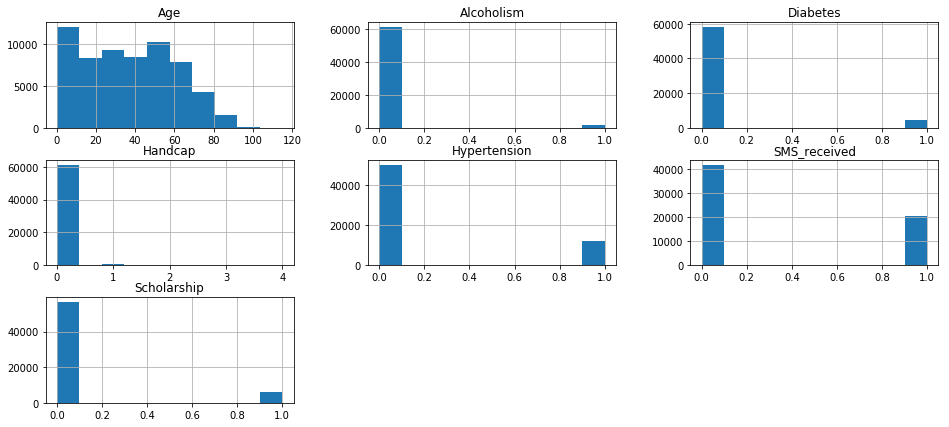

In [20]:
df.hist(figsize=(16,7));

firstly we need to seprate the patients that showed versus the ones that did not

In [9]:
show=df.No_show=='No'
no_show=df.No_show=='Yes'


we need to briefly analyse the no show patients and show

In [22]:
df[show].mean(),df[no_show].mean()

(Age             37.401976
 Scholarship      0.089432
 Hypertension     0.204032
 Diabetes         0.072967
 Alcoholism       0.023151
 Handcap          0.020856
 SMS_received     0.297435
 dtype: float64, Age             33.843435
 Scholarship      0.107193
 Hypertension     0.165587
 Diabetes         0.062331
 Alcoholism       0.028377
 Handcap          0.017059
 SMS_received     0.450340
 dtype: float64)

## the average age of patients that showed up we 38 and the no show were 34

### investigation of attending factors

#does age have a correlation with attendance

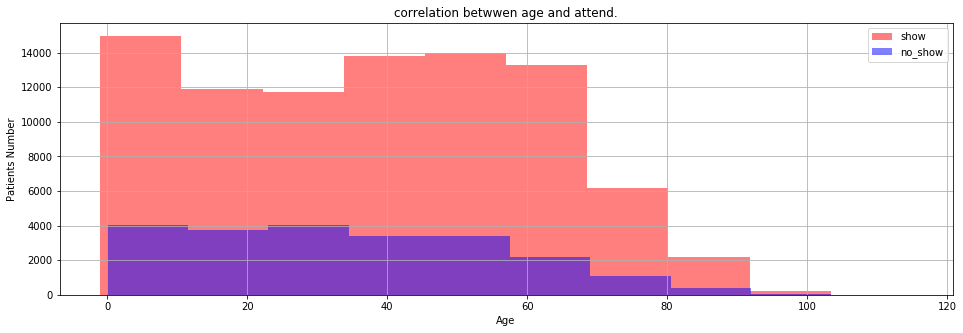

In [10]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='red',label='show')
    df[col_name][no_show].hist(alpha=0.5,bins=10,color='blue',label='no_show')
    plt.legend();
    plt.title('correlation betwwen age and attend.')
    plt.xlabel('Age')
    plt.ylabel('Patients Number')
attendance(df,'Age',show,no_show)    

    
    
    
    
    

# we notice that young patients up to age 15 are the most frequent visitors because parents are more concerned we also see there is a spike in adults so we need to further invistigate

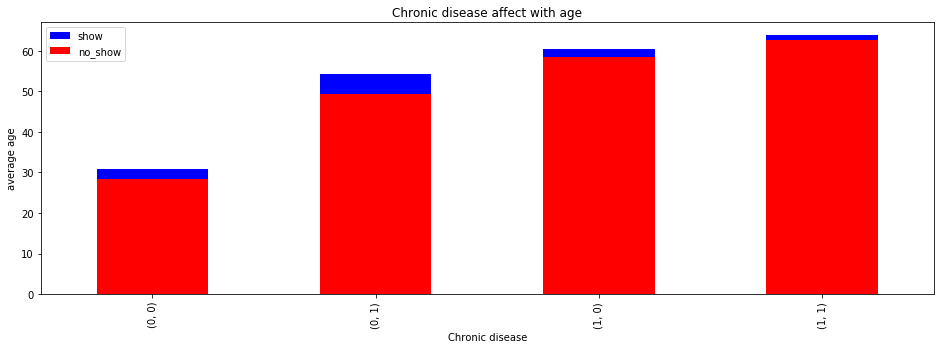

In [25]:
#does chronic disease with age also affects the attendance
plt.figure(figsize=[16,5])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='no_show')
plt.legend();
plt.title('Chronic disease affect with age')
plt.xlabel('Chronic disease')
plt.ylabel('average age');



# chronic disease does not affect attendance

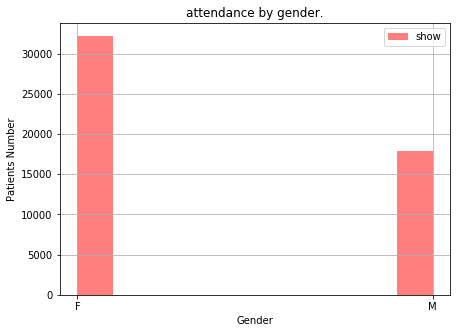

In [29]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[7,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='red',label='show')
    plt.legend();
    plt.title('attendance by gender.')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
attendance(df,'Gender',show,no_show)   

### females attend and show up more than males by less than double

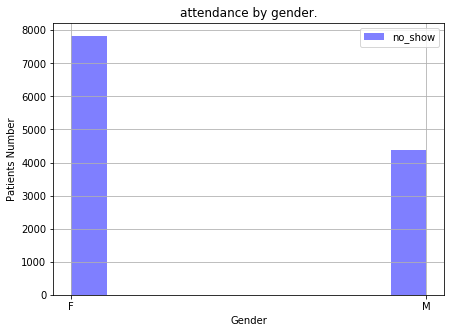

In [30]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[7,5])
    df[col_name][no_show].hist(alpha=0.5,bins=10,color='blue',label='no_show')
    plt.legend();
    plt.title('attendance by gender.')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
attendance(df,'Gender',show,no_show) 

### also females are more likely to not show up

## how about sending sms to remind the patients of their follow-up appointment

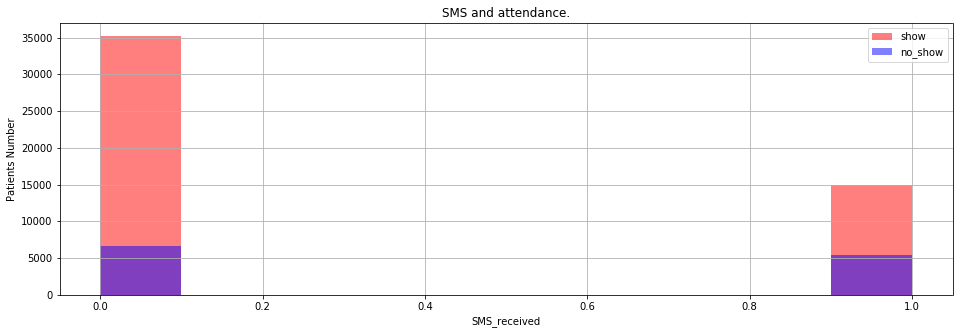

In [32]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,5])
    df[col_name][show].hist(alpha=0.5,bins=10,color='red',label='show')
    df[col_name][no_show].hist(alpha=0.5,bins=10,color='blue',label='no_show')
    plt.legend();
    plt.title('SMS and attendance.')
    plt.xlabel('SMS_received')
    plt.ylabel('Patients Number')
attendance(df,'SMS_received',show,no_show) 

### sending a message and reminding patients influence greatly the number of attendance

### finally how about the geographical postion 

Text(0,0.5,'Patients Number')

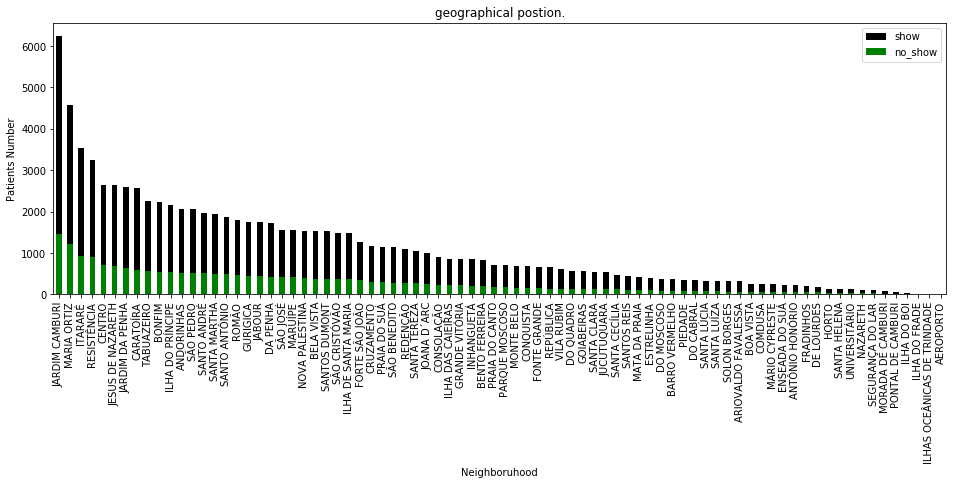

In [22]:
df_show=df.Neighbourhood[show].value_counts()
df_noshow=df.Neighbourhood[no_show].value_counts()
plt.figure(figsize=[16,5])
df_show.plot(kind='bar',color='black',label='show')
df_noshow.plot(kind='bar',color='green',label='no_show')
plt.legend();
plt.title('geographical postion.')
plt.xlabel('Neighboruhood')
plt.ylabel('Patients Number')

### neighbourhood does affect the attendance

<a id='conclusions'></a>
## Conclusions

neighbouhoods such as(jardim cambure,maria ortez,itarare) show the highest attendance number
age is also affecting the visitation rates where young childern are are the largest number of attending patients
sending sms also affects the show up number
### Limitations
Gender chronic disease and scholarship does not affect the numbers 

## Submitting your Project 



In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Invistagating_medical_no_shows.ipynb'])

0